In [2]:
# Importing necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
import re 
from datetime import datetime
from scipy import stats
from scipy.stats import ttest_ind, t


# Importing Datasets


In [3]:
# Loading transaction dataset
transaction_df = pd.read_excel('data/QVI_transaction_data.xlsx')

purchase_df = pd.read_csv('data/QVI_purchase_behaviour.csv')


In [4]:
# Displaying the first 20 rows of the dataset for brief overview
transaction_df.head(20)

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0   43390          1            1000       1         5   
1   43599          1            1307     348        66   
2   43605          1            1343     383        61   
3   43329          2            2373     974        69   
4   43330          2            2426    1038       108   
5   43604          4            4074    2982        57   
6   43601          4            4149    3333        16   
7   43601          4            4196    3539        24   
8   43332          5            5026    4525        42   
9   43330          7            7150    6900        52   
10  43602          7            7215    7176        16   
11  43332          8            8294    8221       114   
12  43603          9            9208    8634        15   
13  43329         13           13213   12447        92   
14  43600         19           19272   16686        44   
15  43604         20           20164   17136        54   
16  43330         20           20418   17413        94   
17  43326         22           22411   18646        98   
18  43329         22           22456   18696        93   
19  43601         23           23067   19162        56   

                                   PROD_NAME  PROD_QTY  TOT_SALES  
0     Natural Chip        Compny SeaSalt175g         2        6.0  
1                   CCs Nacho Cheese    175g         3        6.3  
2     Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3     Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4   Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
5   Old El Paso Salsa   Dip Tomato Mild 300g         1        5.1  
6   Smiths Crinkle Chips Salt & Vinegar 330g         1        5.7  
7      Grain Waves         Sweet Chilli 210g         1        3.6  
8    Doritos Corn Chip Mexican Jalapeno 150g         1        3.9  
9      Grain Waves Sour    Cream&Chives 210G         2        7.2  
10  Smiths Crinkle Chips Salt & Vinegar 330g         1        5.7  
11     Kettle Sensations   Siracha Lime 150g         5       23.0  
12                  Twisties Cheese     270g         2        9.2  
13          WW Crinkle Cut      Chicken 175g         1        1.7  
14            Thins Chips Light&  Tangy 175g         1        3.3  
15                         CCs Original 175g         1        2.1  
16                         Burger Rings 220g         4        9.2  
17    NCC Sour Cream &    Garden Chives 175g         1        3.0  
18   Doritos Corn Chip Southern Chicken 150g         1        3.9  
19                  Cheezels Cheese Box 125g         1        2.1

In [5]:
purchase_df.head(20)

LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0             1000   YOUNG SINGLES/COUPLES          Premium
1             1002   YOUNG SINGLES/COUPLES       Mainstream
2             1003          YOUNG FAMILIES           Budget
3             1004   OLDER SINGLES/COUPLES       Mainstream
4             1005  MIDAGE SINGLES/COUPLES       Mainstream
5             1007   YOUNG SINGLES/COUPLES           Budget
6             1009            NEW FAMILIES          Premium
7             1010   YOUNG SINGLES/COUPLES       Mainstream
8             1011   OLDER SINGLES/COUPLES       Mainstream
9             1012          OLDER FAMILIES       Mainstream
10            1013                RETIREES           Budget
11            1016          OLDER FAMILIES       Mainstream
12            1018   YOUNG SINGLES/COUPLES       Mainstream
13            1019   OLDER SINGLES/COUPLES          Premium
14            1020   YOUNG SINGLES/COUPLES       Mainstream
15            1022          OLDER FAMILIES           Budget
16            1023  MIDAGE SINGLES/COUPLES          Premium
17            1024   YOUNG SINGLES/COUPLES          Premium
18            1025          YOUNG FAMILIES           Budget
19            1026  MIDAGE SINGLES/COUPLES          Premium

## Transaction Data 

### Exploratory Data Analysis



In [6]:
# Check out datatype of each column
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [7]:
# Inspect data for missing values 
transaction_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

### Data Cleaning

#### Handling Duplicate(s)

In [8]:
# Inspect data for duplicates 
transaction_df.duplicated().value_counts()

False    264835
True          1
Name: count, dtype: int64

In [9]:
# Inspect duplicate value and handle it 
duplicate = transaction_df[transaction_df.duplicated()]
duplicate

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
124845  43374        107          107024  108462        45   

                                     PROD_NAME  PROD_QTY  TOT_SALES  
124845  Smiths Thinly Cut   Roast Chicken 175g         2        6.0

In [10]:
transaction_df = transaction_df.drop_duplicates()

### Inspecting Product Names

In [11]:
transaction_df['PROD_NAME'].describe()

count                                     264835
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [12]:
unique_prod_names = transaction_df['PROD_NAME'].unique()
unique_prod_names

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [13]:
''' Using RegEx to remove special characters in product names: 
[^\w\s]: \w matches alphanumeric character (letters & digits) and underscore (_), \s matches whitespace 
^ negates everything in \w and \s and matches special characters 
(\s?\d+\s?[a-zA-Z]+$): \d+ matches one or more digit, \s+ matches one or none whitespace, [a-zA-Z]+$ matches one or more 
alphabetic characters at the end of string '''

cleaned_prod_names = [re.sub(r'[^\w\s]|(\s\d+\s?[a-zA-Z]+$)', '', name) for name in unique_prod_names]
cleaned_prod_names

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
/var/folders/7m/wfwdc8s14pgch1s3hgyyg6080000gn/T/ipykernel_95241/3914086034.py:1: SyntaxWarning: invalid escape sequence '\w'
  ''' Using RegEx to remove special characters in product names:


['Natural Chip        Compny SeaSalt175g',
 'CCs Nacho Cheese   ',
 'Smiths Crinkle Cut  Chips Chicken',
 'Smiths Chip Thinly  SCreamOnion',
 'Kettle Tortilla ChpsHnyJlpno Chili',
 'Old El Paso Salsa   Dip Tomato Mild',
 'Smiths Crinkle Chips Salt  Vinegar',
 'Grain Waves         Sweet Chilli',
 'Doritos Corn Chip Mexican Jalapeno',
 'Grain Waves Sour    CreamChives',
 'Kettle Sensations   Siracha Lime',
 'Twisties Cheese    ',
 'WW Crinkle Cut      Chicken',
 'Thins Chips Light  Tangy',
 'CCs Original',
 'Burger Rings',
 'NCC Sour Cream     Garden Chives',
 'Doritos Corn Chip Southern Chicken',
 'Cheezels Cheese Box',
 'Smiths Crinkle      Original',
 'Infzns Crn Crnchers Tangy Gcamole',
 'Kettle Sea Salt     And Vinegar',
 'Smiths Chip Thinly  Cut Original',
 'Kettle Original',
 'Red Rock Deli Thai  ChilliLime',
 'Pringles Sthrn FriedChicken',
 'Pringles SweetSpcy BBQ',
 'Red Rock Deli SR    Salsa  Mzzrlla',
 'Thins Chips         Originl saltd',
 'Red Rock Deli Sp    Salt  Truffle',


In [14]:
product_words = pd.Series(" ".join(cleaned_prod_names).split())
product_words_df = product_words.to_frame('words')

In [15]:
# Sort product words based on frequency 
product_words_df.value_counts()

words  
Chips      21
Smiths     16
Cut        14
Crinkle    14
Kettle     13
           ..
GrnWves     1
Hony        1
Hot         1
HrbSpce     1
saltd       1
Name: count, Length: 195, dtype: int64

In [16]:
# Remove Salsa-related products 
transaction_df = transaction_df[transaction_df['PROD_NAME'].str.contains("Salsa") == False]
transaction_df.sample(20)

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
170762  43311        258          258385  257379        45   
159491  43489        109          109207  111401       112   
109455  43573        144          144076  144300        96   
39836   43493         88           88108   86763        77   
33976   43566         19           19150   16305        28   
100775  43523         15           15123   13498        79   
106708  43513        102          102062  101882        27   
194263  43622        123          123252  127108         2   
38361   43476         70           70164   68440         3   
55454   43327        133          133030  136148        43   
68970   43439        262          262150  262161        98   
125359  43641        113          113212  116810        71   
65317   43625        181          181343  183995        14   
79852   43551        250          250146  252092        89   
168591  43463        229          229010  230408        18   
88296   43366        106          106192  107906       109   
144076  43393        156          156172  157791       114   
26309   43389        100          100147   99347        61   
230333  43454         47           47046   42418        62   
157682  43319         87           87115   85831        17   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
170762    Smiths Thinly Cut   Roast Chicken 175g         2        6.0  
159491    Tyrrells Crisps     Ched & Chives 165g         2        8.4  
109455            WW Original Stacked Chips 160g         2        3.8  
39836      Doritos Corn Chips  Nacho Cheese 170g         2        8.8  
33976       Thins Potato Chips  Hot & Spicy 175g         2        6.6  
100775    Smiths Chip Thinly  CutSalt/Vinegr175g         2        6.0  
106708       WW Supreme Cheese   Corn Chips 200g         2        3.8  
194263    Cobs Popd Sour Crm  &Chives Chips 110g         2        7.6  
38361   Kettle Sensations   Camembert & Fig 150g         2        9.2  
55454         Smith Crinkle Cut   Bolognese 150g         1        2.6  
68970     NCC Sour Cream &    Garden Chives 175g         2        6.0  
125359           Twisties Cheese     Burger 250g         2        8.6  
65317     Smiths Crnkle Chip  Orgnl Big Bag 380g         2       11.8  
79852    Kettle Sweet Chilli And Sour Cream 175g         2       10.8  
168591            Cheetos Chs & Bacon Balls 190g         2        6.6  
88296                   Pringles Barbeque   134g         2        7.4  
144076     Kettle Sensations   Siracha Lime 150g         2        9.2  
26309     Smiths Crinkle Cut  Chips Chicken 170g         2        5.8  
230333          Pringles Mystery    Flavour 134g         2        7.4  
157682        Kettle Sensations   BBQ&Maple 150g         2        9.2

In [17]:
transaction_df['LYLTY_CARD_NBR'].nunique()

71288

### Handling Outlier

In [18]:
# Run statistics summary to identify potential outliers
transaction_df.describe(include='all').round(2)

DATE  STORE_NBR  LYLTY_CARD_NBR      TXN_ID   PROD_NBR  \
count   246741.00  246741.00       246741.00   246741.00  246741.00   
unique        NaN        NaN             NaN         NaN        NaN   
top           NaN        NaN             NaN         NaN        NaN   
freq          NaN        NaN             NaN         NaN        NaN   
mean     43464.06     135.05       135531.10   135131.21      56.35   
std        105.40      76.79        80715.42    78147.86      33.70   
min      43282.00       1.00         1000.00        1.00       1.00   
25%      43373.00      70.00        70015.00    67569.00      26.00   
50%      43464.00     130.00       130367.00   135184.00      53.00   
75%      43555.00     203.00       203084.00   202654.00      87.00   
max      43646.00     272.00      2373711.00  2415841.00     114.00   

                                     PROD_NAME   PROD_QTY  TOT_SALES  
count                                   246741  246741.00  246741.00  
unique                                     105        NaN        NaN  
top     Kettle Mozzarella   Basil & Pesto 175g        NaN        NaN  
freq                                      3304        NaN        NaN  
mean                                       NaN       1.91       7.32  
std                                        NaN       0.66       3.08  
min                                        NaN       1.00       1.70  
25%                                        NaN       2.00       5.80  
50%                                        NaN       2.00       7.40  
75%                                        NaN       2.00       8.80  
max                                        NaN     200.00     650.00

In [19]:
# Finding transactions with product quantity of 200
prod_qty_200 = transaction_df[transaction_df['PROD_QTY'] == 200]
prod_qty_200



DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762  43331        226          226000  226201         4   
69763  43605        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0

In [20]:
# Finding customer who purchased 200 bags of chips to see if they ever made any other transactions
out_customer = transaction_df[transaction_df['LYLTY_CARD_NBR'] == 226000]
out_customer

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762  43331        226          226000  226201         4   
69763  43605        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0

In [21]:
# Due to their commerical purchase, it is recommended to remove their transactions altogether 
transaction_df = transaction_df[transaction_df['LYLTY_CARD_NBR'] != 226000]

### Converting Datatypes 

In [22]:
# Convert columns with inappropriate dtype (numerical) to object 
categorical_columns = ['STORE_NBR','LYLTY_CARD_NBR','TXN_ID',
                       'PROD_NBR']
for col in categorical_columns:
    transaction_df[col] = transaction_df[col].astype("object")

### Count Transactions by Date 

In [23]:
# Converting date column dtype to datetime 
transaction_df['DATE'] = pd.to_datetime(transaction_df['DATE'], unit='D', origin='1899-12-30')

In [24]:
transaction_by_date = transaction_df.groupby('DATE').agg(num_of_transactions=pd.NamedAgg(column='DATE', aggfunc='count')).reset_index()
transaction_by_date['DATE'] = pd.to_datetime(transaction_by_date['DATE']).dt.normalize()  # Normalize to just the date
transaction_by_date.sort_values(by='DATE')

DATE  num_of_transactions
0   2018-07-01                  663
1   2018-07-02                  650
2   2018-07-03                  674
3   2018-07-04                  669
4   2018-07-05                  660
..         ...                  ...
359 2019-06-26                  657
360 2019-06-27                  669
361 2019-06-28                  673
362 2019-06-29                  703
363 2019-06-30                  704

[364 rows x 2 columns]

In [74]:
transaction_by_date['MONTH'] = transaction_by_date['DATE'].dt.month
monthly_transaction = transaction_by_date.groupby('MONTH').agg(num_of_transactions=pd.NamedAgg(column='num_of_transactions', aggfunc='sum')).reset_index()
monthly_transaction.describe()


MONTH  num_of_transactions
count  12.000000            12.000000
mean    6.500000         20561.583333
std     3.605551           590.012551
min     1.000000         19005.000000
25%     3.750000         20338.750000
50%     6.500000         20690.500000
75%     9.250000         20902.000000
max    12.000000         21225.000000

In [25]:
# Adding dates from 1 Jul 2018 to 30 Jun 2019
full_date = pd.date_range(start='2018-07-01', end='2019-06-30')
full_date = pd.DataFrame(full_date, columns=['DATE'])
full_date
# Merge with transation count table
merged_df = pd.merge(full_date,transaction_by_date, on='DATE', how='left')
merged_df = merged_df.fillna(0)
missing_date = merged_df[merged_df['num_of_transactions'] == 0]
missing_date


DATE  num_of_transactions
177 2018-12-25                  0.0

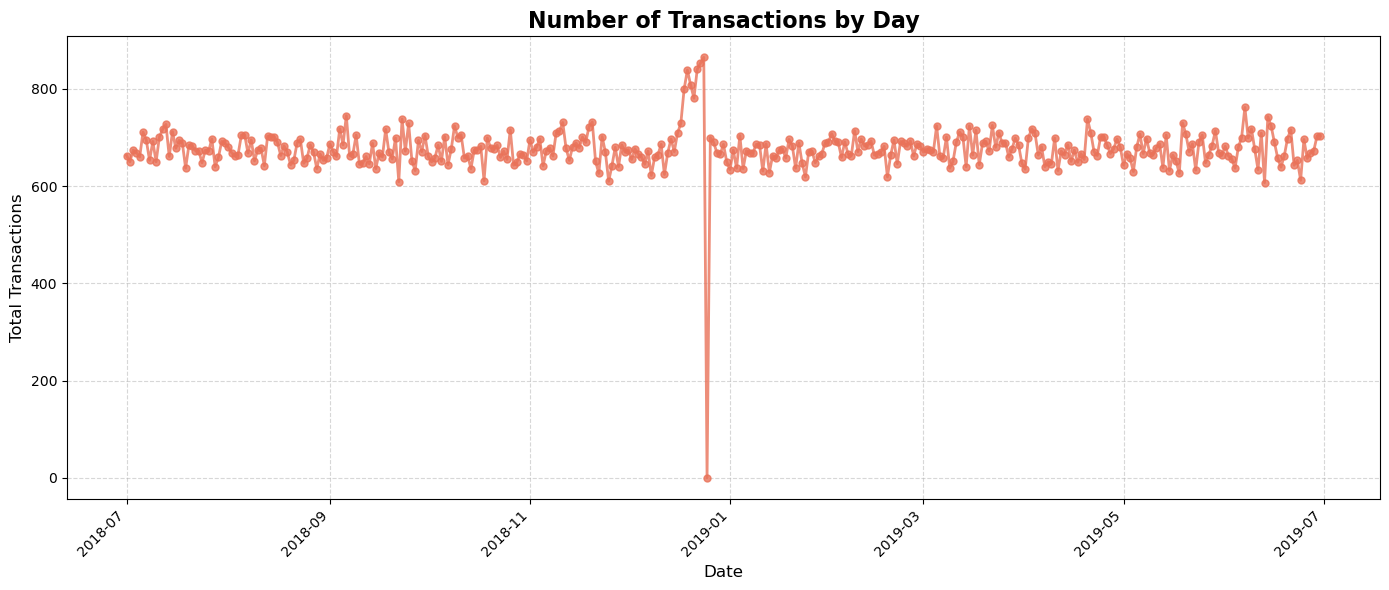

In [67]:
# Creating plot for transaction count by date 

plt.figure(figsize=(14,6), dpi=100)

plt.title('Number of Transactions by Day', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)


plt.plot(merged_df['DATE'], merged_df['num_of_transactions'], 
         linewidth=2, color='#E97259', marker='o', markersize=5, linestyle='-', alpha=0.8)

plt.xticks(rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout() 
plt.show()

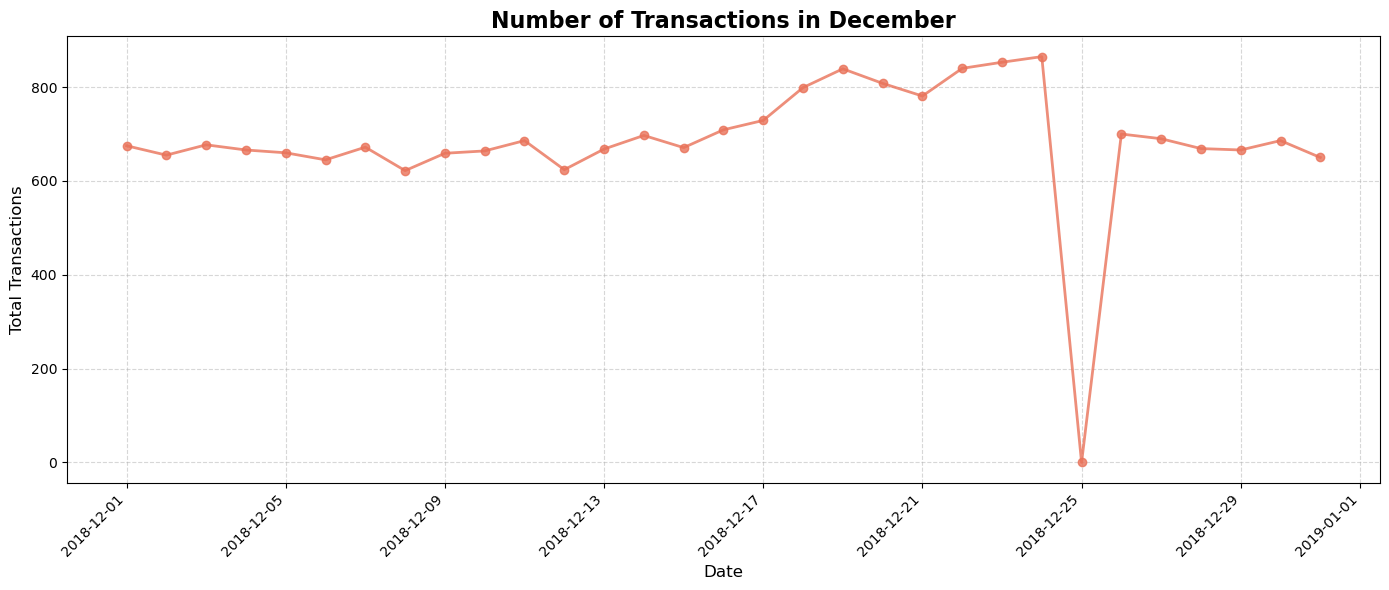

In [66]:
# Recreate the chart with focus on December only 
december = merged_df.query('DATE > "2018-11-30" and DATE < "2019-01-01"')
plt.figure(figsize=(14,6), dpi=100)

plt.title("Number of Transactions in December", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Transactions", fontsize=12)

plt.plot(december['DATE'], december['num_of_transactions'], 
         linewidth=2, color='#E97259', marker='o', markersize=6, linestyle='-', alpha=0.8)

plt.xticks(rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

##### There was a significant dip in sales on December 25, 2018, which was expected as it was a national holiday where the majority of retailers are closed. 

### Product Analysis 

In [28]:
# Extracting Pack Size from PROD_NAME 
transaction_df['PACK_SIZE'] = [re.findall(r'\d+', name)[0] for name in transaction_df['PROD_NAME']]
transaction_df

DATE STORE_NBR LYLTY_CARD_NBR  TXN_ID PROD_NBR  \
0      2018-10-17         1           1000       1        5   
1      2019-05-14         1           1307     348       66   
2      2019-05-20         1           1343     383       61   
3      2018-08-17         2           2373     974       69   
4      2018-08-18         2           2426    1038      108   
...           ...       ...            ...     ...      ...   
264831 2019-03-09       272         272319  270088       89   
264832 2018-08-13       272         272358  270154       74   
264833 2018-11-06       272         272379  270187       51   
264834 2018-12-27       272         272379  270188       42   
264835 2018-09-22       272         272380  270189       74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g         3        6.3   
2         Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3         Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
4       Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   
...                                          ...       ...        ...   
264831   Kettle Sweet Chilli And Sour Cream 175g         2       10.8   
264832             Tostitos Splash Of  Lime 175g         1        4.4   
264833                  Doritos Mexicana    170g         2        8.8   
264834   Doritos Corn Chip Mexican Jalapeno 150g         2        7.8   
264835             Tostitos Splash Of  Lime 175g         2        8.8   

       PACK_SIZE  
0            175  
1            175  
2            170  
3            175  
4            150  
...          ...  
264831       175  
264832       175  
264833       170  
264834       150  
264835       175  

[246739 rows x 9 columns]

In [29]:
pack_size_counts = transaction_df['PACK_SIZE'].value_counts()
pack_size_counts

PACK_SIZE
175    66389
150    40203
134    25102
110    22387
170    19983
165    15297
330    12540
380     6416
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: count, dtype: int64

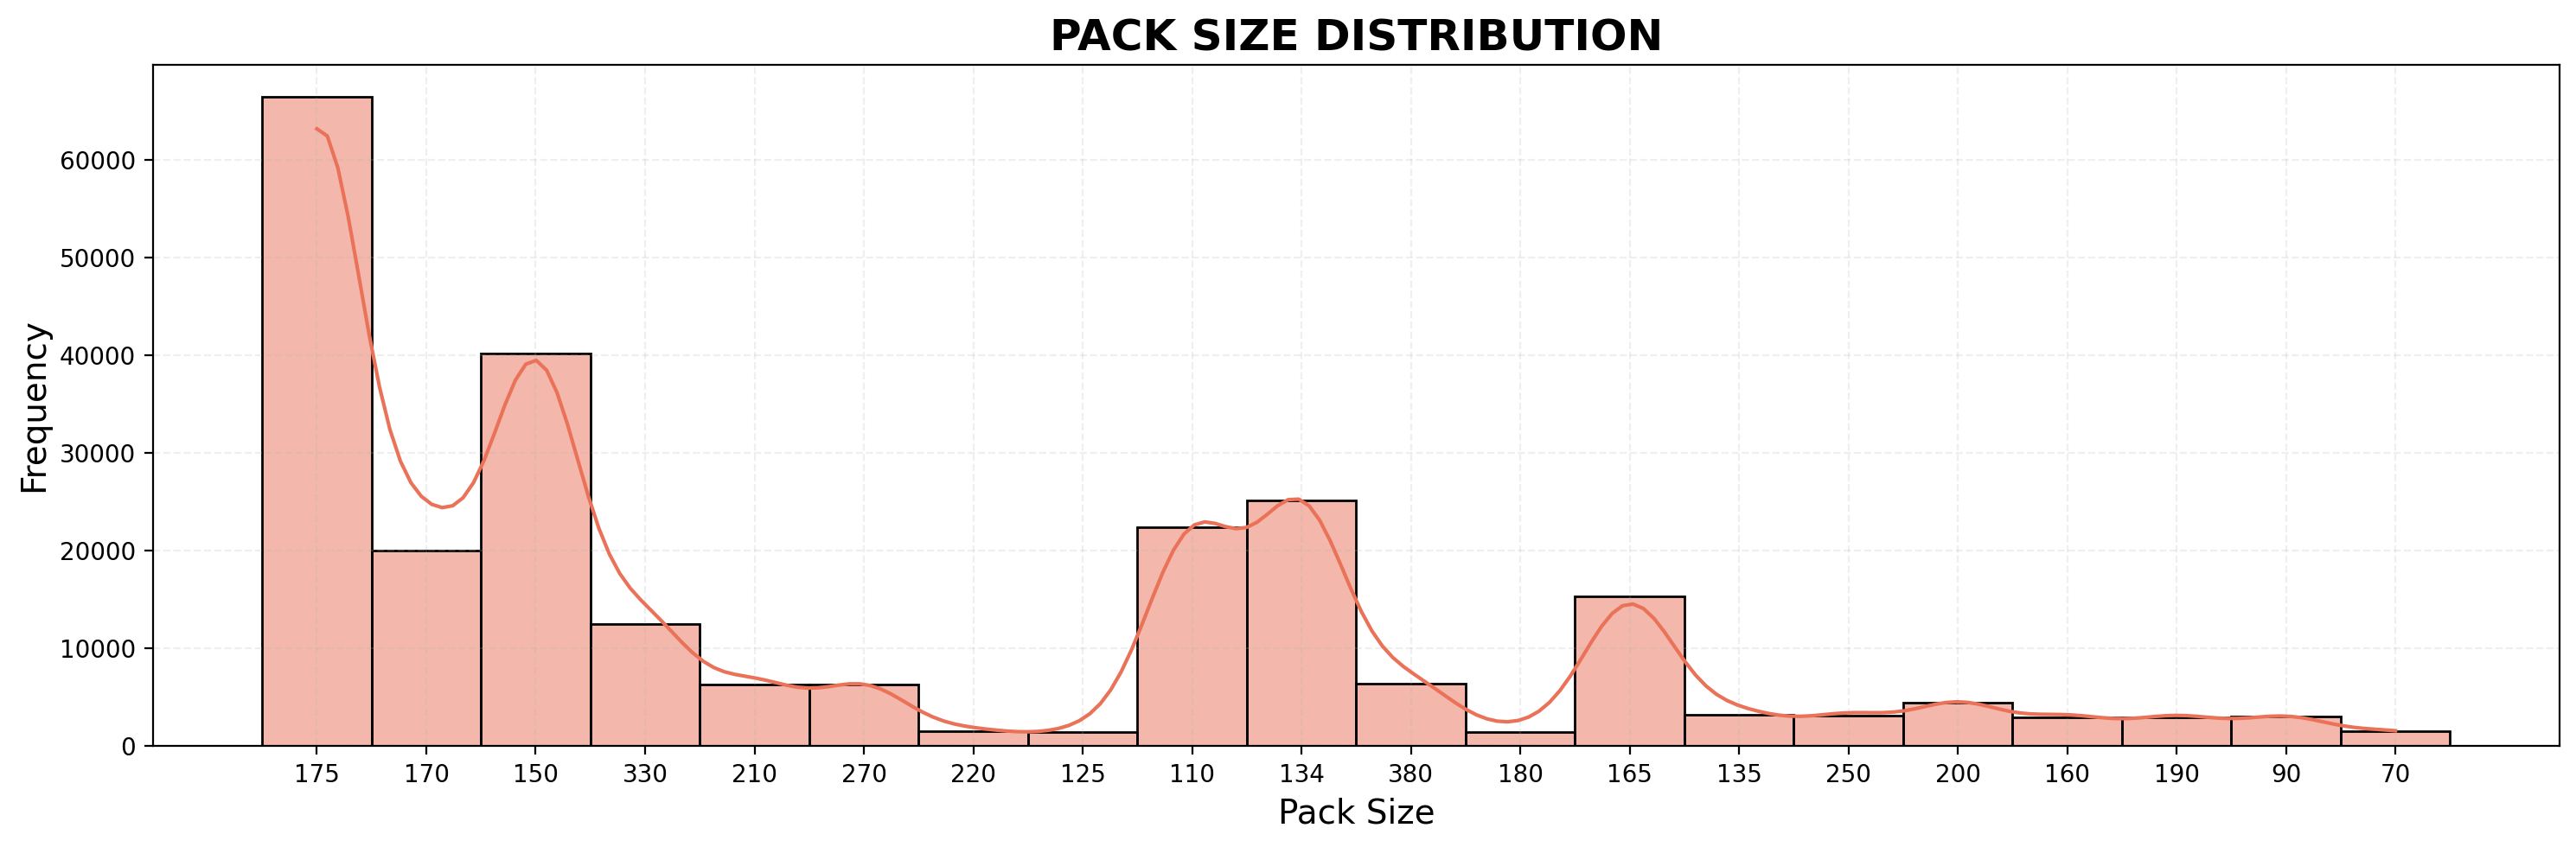

In [65]:
plt.figure(figsize=(15, 5), dpi=200)

plt.title("PACK SIZE DISTRIBUTION", fontsize=18, fontweight='bold')
plt.xlabel("Pack Size", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

sns.histplot(data=transaction_df, 
             x='PACK_SIZE', 
             color='#E97259', 
             kde=True,  # Add kernel density estimation for smoother representation
             bins=30)   # Adjust bin size for better data grouping

plt.grid(True, linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()

##### Pack size of 175g is most popular 

In [31]:
# Extracting brand names from PROD_NAME
transaction_df['BRAND'] = transaction_df['PROD_NAME'].str.split(' ').str[0]
transaction_df.head(20)

DATE STORE_NBR LYLTY_CARD_NBR TXN_ID PROD_NBR  \
0  2018-10-17         1           1000      1        5   
1  2019-05-14         1           1307    348       66   
2  2019-05-20         1           1343    383       61   
3  2018-08-17         2           2373    974       69   
4  2018-08-18         2           2426   1038      108   
6  2019-05-16         4           4149   3333       16   
7  2019-05-16         4           4196   3539       24   
8  2018-08-20         5           5026   4525       42   
9  2018-08-18         7           7150   6900       52   
10 2019-05-17         7           7215   7176       16   
11 2018-08-20         8           8294   8221      114   
12 2019-05-18         9           9208   8634       15   
13 2018-08-17        13          13213  12447       92   
14 2019-05-15        19          19272  16686       44   
15 2019-05-19        20          20164  17136       54   
16 2018-08-18        20          20418  17413       94   
17 2018-08-14        22          22411  18646       98   
18 2018-08-17        22          22456  18696       93   
19 2019-05-16        23          23067  19162       56   
20 2019-05-19        25          25105  21815        7   

                                   PROD_NAME  PROD_QTY  TOT_SALES PACK_SIZE  \
0     Natural Chip        Compny SeaSalt175g         2        6.0       175   
1                   CCs Nacho Cheese    175g         3        6.3       175   
2     Smiths Crinkle Cut  Chips Chicken 170g         2        2.9       170   
3     Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0       175   
4   Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8       150   
6   Smiths Crinkle Chips Salt & Vinegar 330g         1        5.7       330   
7      Grain Waves         Sweet Chilli 210g         1        3.6       210   
8    Doritos Corn Chip Mexican Jalapeno 150g         1        3.9       150   
9      Grain Waves Sour    Cream&Chives 210G         2        7.2       210   
10  Smiths Crinkle Chips Salt & Vinegar 330g         1        5.7       330   
11     Kettle Sensations   Siracha Lime 150g         5       23.0       150   
12                  Twisties Cheese     270g         2        9.2       270   
13          WW Crinkle Cut      Chicken 175g         1        1.7       175   
14            Thins Chips Light&  Tangy 175g         1        3.3       175   
15                         CCs Original 175g         1        2.1       175   
16                         Burger Rings 220g         4        9.2       220   
17    NCC Sour Cream &    Garden Chives 175g         1        3.0       175   
18   Doritos Corn Chip Southern Chicken 150g         1        3.9       150   
19                  Cheezels Cheese Box 125g         1        2.1       125   
20         Smiths Crinkle      Original 330g         1        5.7       330   

       BRAND  
0    Natural  
1        CCs  
2     Smiths  
3     Smiths  
4     Kettle  
6     Smiths  
7      Grain  
8    Doritos  
9      Grain  
10    Smiths  
11    Kettle  
12  Twisties  
13        WW  
14     Thins  
15       CCs  
16    Burger  
17       NCC  
18   Doritos  
19  Cheezels  
20    Smiths

In [32]:
transaction_df['BRAND'].value_counts()

BRAND
Kettle        41288
Smiths        27389
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64

In [33]:
# Combining brand names for data consistency and integrity
transaction_df['BRAND'] = transaction_df['BRAND'].str.replace('Red','RRD')
transaction_df['BRAND'] = transaction_df['BRAND'].str.replace('Woolworths','WW')
transaction_df['BRAND'] = transaction_df['BRAND'].str.replace('Infuzions','Infzns')
transaction_df['BRAND'] = transaction_df['BRAND'].str.replace('Smiths','Smith')
transaction_df['BRAND'] = transaction_df['BRAND'].str.replace('Sunbites','Snbts')
transaction_df['BRAND'] = transaction_df['BRAND'].str.replace('Grain','GrnWves')
transaction_df['BRAND'] = transaction_df['BRAND'].str.replace('Natural','NCC')
transaction_df['BRAND'] = transaction_df['BRAND'].str.replace('Doritos','Dorito')

In [34]:
transaction_df['BRAND'].value_counts()

BRAND
Kettle      41288
Smith       30352
Dorito      25224
Pringles    25102
RRD         16321
Infzns      14201
Thins       14075
WW          11836
Cobs         9693
Tostitos     9471
Twisties     9454
GrnWves      7740
NCC          7469
Tyrrells     6442
Cheezels     4603
CCs          4551
Snbts        3008
Cheetos      2927
Burger       1564
French       1418
Name: count, dtype: int64

## Customer Data 

### Exploratory Data Analysis 

In [35]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [36]:
purchase_df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [37]:
purchase_df.duplicated().value_counts()

False    72637
Name: count, dtype: int64

### Combining 2 Datasets for Further Analysis 

In [38]:
# Merging 2 datasets 
combined_df = pd.merge(transaction_df, purchase_df)
combined_df

DATE STORE_NBR LYLTY_CARD_NBR  TXN_ID PROD_NBR  \
0      2018-10-17         1           1000       1        5   
1      2019-05-14         1           1307     348       66   
2      2019-05-20         1           1343     383       61   
3      2018-08-17         2           2373     974       69   
4      2018-08-18         2           2426    1038      108   
...           ...       ...            ...     ...      ...   
246734 2019-03-09       272         272319  270088       89   
246735 2018-08-13       272         272358  270154       74   
246736 2018-11-06       272         272379  270187       51   
246737 2018-12-27       272         272379  270188       42   
246738 2018-09-22       272         272380  270189       74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g         3        6.3   
2         Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3         Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
4       Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   
...                                          ...       ...        ...   
246734   Kettle Sweet Chilli And Sour Cream 175g         2       10.8   
246735             Tostitos Splash Of  Lime 175g         1        4.4   
246736                  Doritos Mexicana    170g         2        8.8   
246737   Doritos Corn Chip Mexican Jalapeno 150g         2        7.8   
246738             Tostitos Splash Of  Lime 175g         2        8.8   

       PACK_SIZE     BRAND               LIFESTAGE PREMIUM_CUSTOMER  
0            175       NCC   YOUNG SINGLES/COUPLES          Premium  
1            175       CCs  MIDAGE SINGLES/COUPLES           Budget  
2            170     Smith  MIDAGE SINGLES/COUPLES           Budget  
3            175     Smith  MIDAGE SINGLES/COUPLES           Budget  
4            150    Kettle  MIDAGE SINGLES/COUPLES           Budget  
...          ...       ...                     ...              ...  
246734       175    Kettle   YOUNG SINGLES/COUPLES          Premium  
246735       175  Tostitos   YOUNG SINGLES/COUPLES          Premium  
246736       170    Dorito   YOUNG SINGLES/COUPLES          Premium  
246737       150    Dorito   YOUNG SINGLES/COUPLES          Premium  
246738       175  Tostitos   YOUNG SINGLES/COUPLES          Premium  

[246739 rows x 12 columns]

In [39]:
combined_df.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [40]:
combined_df.to_csv('QVI_data.csv', index=False)

### Customer Purchase Value Based on Lifestages & Premium Levels

In [41]:
combined_df['LIFESTAGE'].value_counts()

LIFESTAGE
OLDER SINGLES/COUPLES     50792
RETIREES                  46431
OLDER FAMILIES            45158
YOUNG FAMILIES            40494
YOUNG SINGLES/COUPLES     33969
MIDAGE SINGLES/COUPLES    23398
NEW FAMILIES               6497
Name: count, dtype: int64

In [42]:
combined_df['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    95043
Budget        86762
Premium       64934
Name: count, dtype: int64

In [43]:
purchase_value = combined_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'TOT_SALES': pd.Series.sum})
purchase_value

TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
MIDAGE SINGLES/COUPLES Budget             33345.70
                       Mainstream         84734.25
                       Premium            54443.85
NEW FAMILIES           Budget             20607.45
                       Mainstream         15979.70
                       Premium            10760.80
OLDER FAMILIES         Budget            156863.75
                       Mainstream         96413.55
                       Premium            75242.60
OLDER SINGLES/COUPLES  Budget            127833.60
                       Mainstream        124648.50
                       Premium           123531.55
RETIREES               Budget            105916.30
                       Mainstream        145168.95
                       Premium            91296.65
YOUNG FAMILIES         Budget            129717.95
                       Mainstream         86338.25
                       Premium            78571.70
YOUNG SINGLES/COUPLES  Budget             57122.10
                       Mainstream        147582.20
                       Premium            39052.30

<Figure size 2800x1000 with 0 Axes>

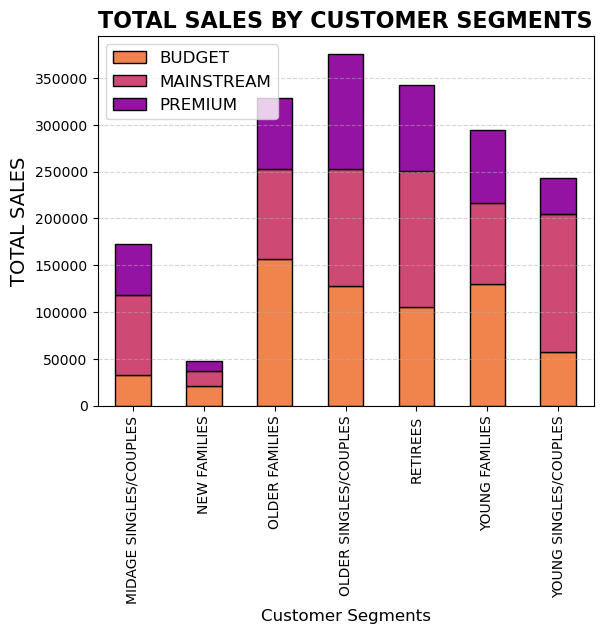

In [60]:
plt.figure(figsize=(14, 5), dpi=200)

purchase_value.unstack().plot(kind='bar', stacked=True, 
                              color=['#F1844C', '#CE4A75', '#9513A2'], edgecolor='black')

plt.ylabel('TOTAL SALES', fontsize=14)
plt.xlabel('Customer Segments', fontsize=12)
plt.title('TOTAL SALES BY CUSTOMER SEGMENTS', fontsize=16, fontweight='bold')

plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.legend(['BUDGET', 'MAINSTREAM', 'PREMIUM'], loc=2, fontsize=12)

plt.show()

From the extracted subset, customers from Older Family - Budget spent the most on chips ($156863.75 of Total Sales) whilst customers from New Family - Premium spent the least ($10760.80). In combination of all premium levels, customers from Older Singles/Couples segment contributed to the highest purchase value ($376013.65), suggesting potential for targeted marketing. Meanwhile, for the Retirees segment, Mainstream customers outspent other groups. 

### Number of Customers in Each Segments 

In [45]:
# Getting the number of unique loyalty card numbers
customers_segment = combined_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'LYLTY_CARD_NBR': pd.Series.nunique})
customers_segment.rename(columns={'LYLTY_CARD_NBR':'NUM_OF_CUSTOMERS'}, inplace=True)


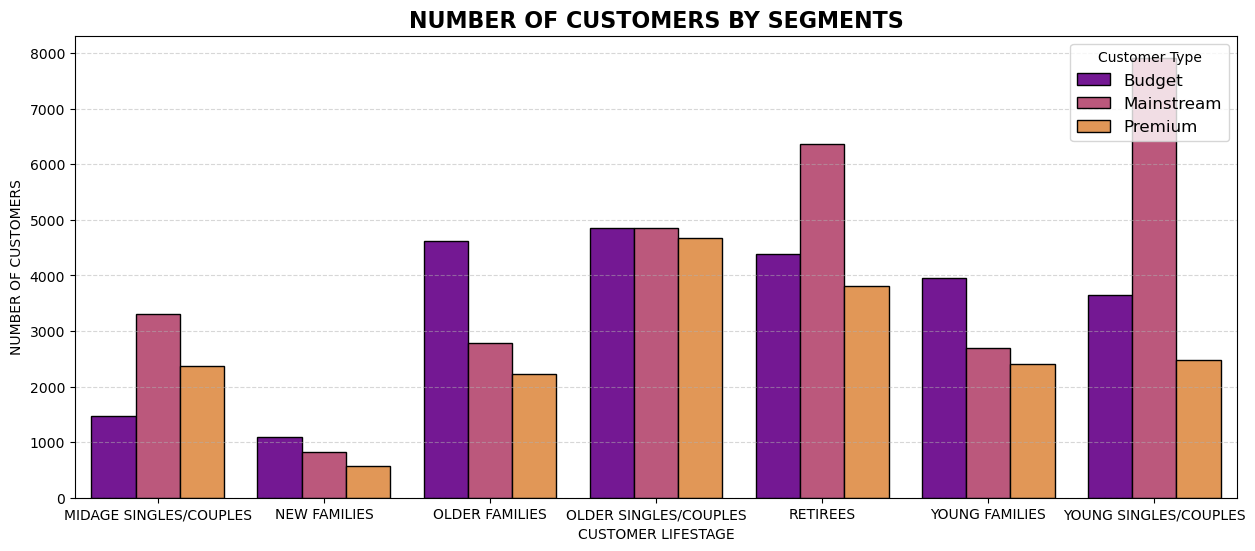

In [58]:
# Visualization of Customers by Segments 
plt.figure(figsize=(15, 6), dpi=100)

ax = sns.barplot(x='LIFESTAGE', y='NUM_OF_CUSTOMERS', 
                 hue='PREMIUM_CUSTOMER', data=customers_segment,
                 palette='plasma', edgecolor='black')

ax.set(xlabel="CUSTOMER LIFESTAGE", ylabel="NUMBER OF CUSTOMERS")

plt.title("NUMBER OF CUSTOMERS BY SEGMENTS", fontsize=16, fontweight='bold')

plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.legend(title="Customer Type", loc='upper right', fontsize=12)

plt.show()

From the chart above, we can see that the majority of customers are Retirees and Young Singles/Couples in the Mainstream level. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.

### Chip Quantity 

In [47]:
chips_qty_by_segment = combined_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'PROD_QTY': pd.Series.sum})
chips_qty_by_segment = pd.merge(customers_segment, chips_qty_by_segment, on=['LIFESTAGE','PREMIUM_CUSTOMER'])
chips_qty_by_segment['AVG_QTY'] = chips_qty_by_segment['PROD_QTY'] / chips_qty_by_segment['NUM_OF_CUSTOMERS']
chips_qty_by_segment.drop(['NUM_OF_CUSTOMERS','PROD_QTY'],axis=1, inplace=True)
chips_qty_by_segment

AVG_QTY
LIFESTAGE              PREMIUM_CUSTOMER          
MIDAGE SINGLES/COUPLES Budget            6.026459
                       Mainstream        6.432080
                       Premium           6.078514
NEW FAMILIES           Budget            4.821527
                       Mainstream        4.891566
                       Premium           4.815652
OLDER FAMILIES         Budget            9.076773
                       Mainstream        9.255380
                       Premium           9.071717
OLDER SINGLES/COUPLES  Budget            6.781398
                       Mainstream        6.712021
                       Premium           6.769116
RETIREES               Budget            6.141847
                       Mainstream        5.925920
                       Premium           6.103358
YOUNG FAMILIES         Budget            8.722995
                       Mainstream        8.638361
                       Premium           8.716013
YOUNG SINGLES/COUPLES  Budget            4.250069
                       Mainstream        4.575597
                       Premium           4.264113

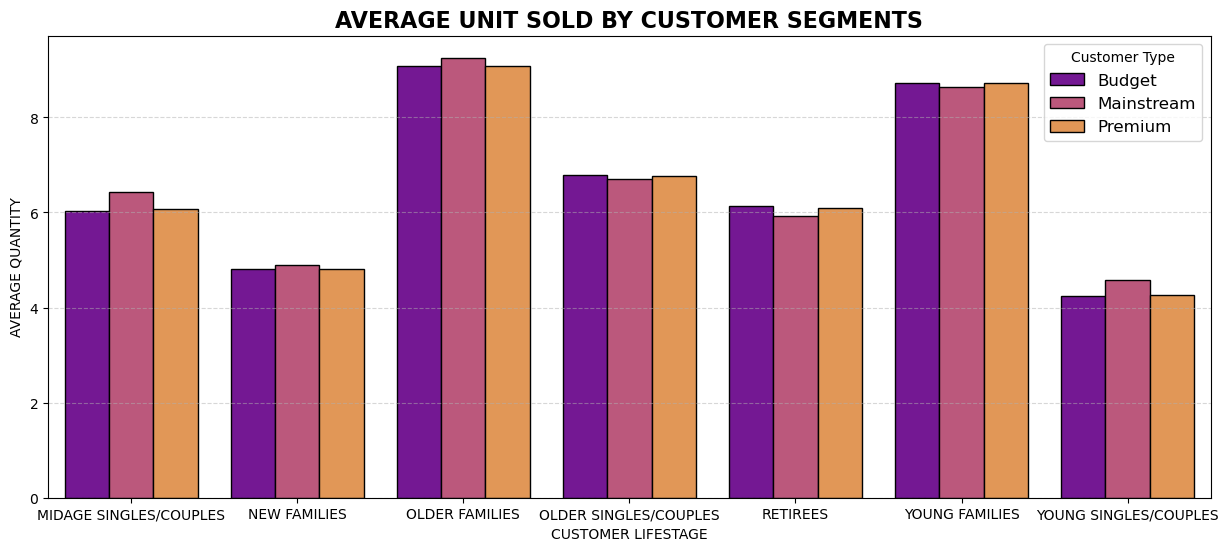

In [59]:
# Visualization of Product Qty by Segments 
plt.figure(figsize=(15, 6), dpi=100)

ax = sns.barplot(x='LIFESTAGE', y='AVG_QTY', 
                 hue='PREMIUM_CUSTOMER', data=chips_qty_by_segment,
                 palette='plasma', edgecolor='black')

ax.set(xlabel="CUSTOMER LIFESTAGE", ylabel="AVERAGE QUANTITY")

plt.title("AVERAGE UNIT SOLD BY CUSTOMER SEGMENTS", fontsize=16, fontweight='bold')

plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.legend(title="Customer Type", loc='upper right', fontsize=12)

plt.show()

The average chip quantity per customers is higher for Older Families and Young Families in general, with each premium level contributed to likely the same number of unit average. 

In [49]:
chips_price = combined_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg(PROD_QTY=('PROD_QTY','sum'), TOT_SALES=('TOT_SALES','sum'))
chips_price['AVG_CHIPS_PRICE'] = chips_price['TOT_SALES'] / chips_price['PROD_QTY']
chips_price.drop(['TOT_SALES','PROD_QTY'],axis=1, inplace=True)
chips_price

AVG_CHIPS_PRICE
LIFESTAGE              PREMIUM_CUSTOMER                 
MIDAGE SINGLES/COUPLES Budget                   3.753878
                       Mainstream               3.994449
                       Premium                  3.780823
NEW FAMILIES           Budget                   3.931969
                       Mainstream               3.935887
                       Premium                  3.886168
OLDER FAMILIES         Budget                   3.747969
                       Mainstream               3.736380
                       Premium                  3.717703
OLDER SINGLES/COUPLES  Budget                   3.887529
                       Mainstream               3.822753
                       Premium                  3.897755
RETIREES               Budget                   3.932731
                       Mainstream               3.852986
                       Premium                  3.924037
YOUNG FAMILIES         Budget                   3.761903
                       Mainstream               3.722439
                       Premium                  3.759232
YOUNG SINGLES/COUPLES  Budget                   3.685297
                       Mainstream               4.074043
                       Premium                  3.692889

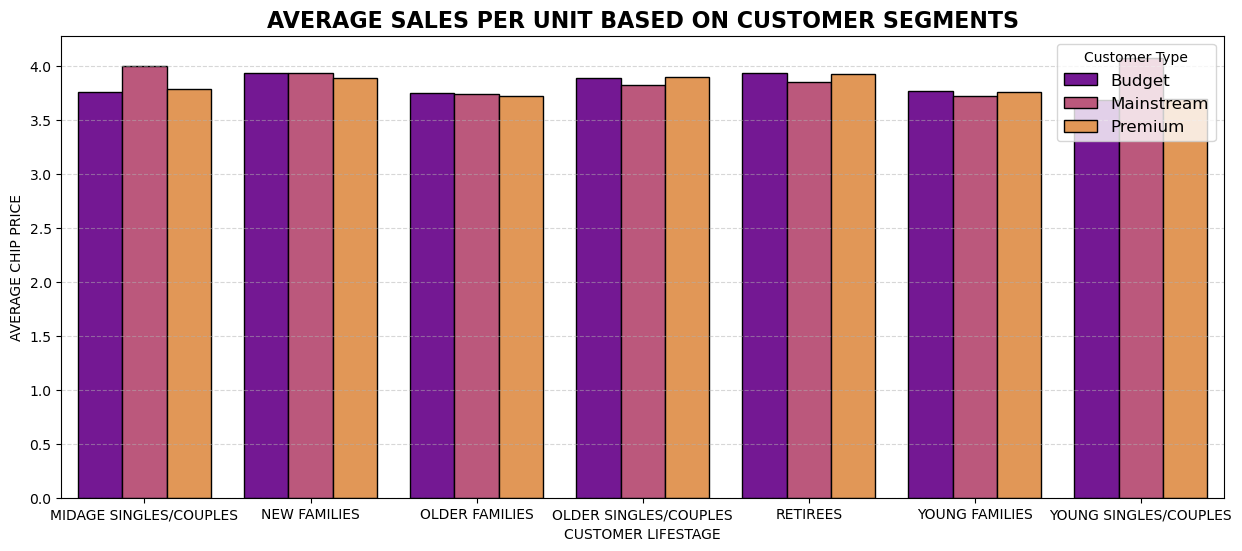

In [50]:
# Visualization of Chip Price by Segments 
plt.figure(figsize=(15, 6), dpi=100)

ax = sns.barplot(x='LIFESTAGE', y='AVG_CHIPS_PRICE', 
                 hue='PREMIUM_CUSTOMER', data=chips_price,
                 palette='plasma', edgecolor='black')

ax.set(xlabel="CUSTOMER LIFESTAGE", ylabel="AVERAGE CHIP PRICE")

plt.title("AVERAGE SALES PER UNIT BASED ON CUSTOMER SEGMENTS", fontsize=16, fontweight='bold')

plt.grid(True, axis='y', linestyle='--', alpha=0.5)


plt.legend(title="Customer Type", loc='upper right', fontsize=12)

plt.show()

From the chart above, Mainstream Midage & Young Singles/Couples are more willing to pay more per packet of chips compared to their Budget and Premium counterparts. Due to various factors, such as shopping habits and diet preference, shoppers from Budget & Premium might not consume chips as much as the Mainstream customers.

### Hypothesis Testing 

In [51]:
print('H0: μmain_stream - μpremium_budget = 0 | Ha: μmain_stream - μpremium_budget =/= 0')

combined_df['PRICE_PER_UNIT'] = combined_df['TOT_SALES'] / combined_df['PROD_QTY']
# Filter data for average price per unit 

mainstream = combined_df[(combined_df['PREMIUM_CUSTOMER'] == "Mainstream") & 
                          (combined_df['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))]['PRICE_PER_UNIT']
premium_budget = combined_df[(combined_df['PREMIUM_CUSTOMER'].isin(["Budget","Premium"])) & (combined_df['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES','MIDAGE SINGLES/COUPLES']))]['PRICE_PER_UNIT']

# Descriptive stats 
mainstream_avg = mainstream.mean()
premium_budget_avg = premium_budget.mean()
print(f"Mainstream Average Price Per Unit: {mainstream_avg} | Budget/Premium Average Price Per Unit: {premium_budget_avg}")

# T critical value: 
df = len(mainstream) + len(premium_budget) - 2 
t_critical = t.ppf(1 - 0.05, df)

print(f"Degree of Freedom: {df} | alpha = 0.05 ")
print(f"T-Critical Value: {t_critical}")

# Perform a two-sample t-test (assuming unequal variances)
t_stat, p_value = stats.ttest_ind(mainstream, premium_budget, equal_var=False)

print(f"T-Test: T-Statistic = {t_stat:.4f}, p-value = {p_value:.4f}")


# Interpretation

if p_value < 0.05:
    print("Conclusion: Reject null hypothesis. There is sufficient evidence to conclude that the average price per unit for Mainstream - Young to MidAge Singles & Couples is different than the average price per unit for Budget/Premium Young to MidAge Singles & Couples.")
else:
    print("Conclusion: Do not reject null hypothesis.There is not sufficient evidence to conclude that the average price per unit for Mainstream - Young to MidAge Singles & Couples is different than the average price per unit for Budget/Premium Young to MidAge Singles & Couples..")

H0: μmain_stream - μpremium_budget = 0 | Ha: μmain_stream - μpremium_budget =/= 0
Mainstream Average Price Per Unit: 4.039785893795489 | Budget/Premium Average Price Per Unit: 3.706491319964083
Degree of Freedom: 57365 | alpha = 0.05 
T-Critical Value: 1.6448801900806482
T-Test: T-Statistic = 37.6244, p-value = 0.0000
Conclusion: Reject null hypothesis. There is sufficient evidence to conclude that the average price per unit for Mainstream - Young to MidAge Singles & Couples is different than the average price per unit for Budget/Premium Young to MidAge Singles & Couples.


### Deep Dive into Mainstream - Young Singles/Couples 

In [52]:
mainstream_young = combined_df[(combined_df['PREMIUM_CUSTOMER'] == "Mainstream") & (combined_df['LIFESTAGE'] == "YOUNG SINGLES/COUPLES")]
others = combined_df[(combined_df['PREMIUM_CUSTOMER'] != "Mainstream") & (combined_df['LIFESTAGE'] != "YOUNG SINGLES/COUPLES")]
total_qty1 = mainstream_young['PROD_QTY'].sum()

brand_qty1 = mainstream_young.groupby('BRAND').agg(MAINSTREAM_PROD_QTY=pd.NamedAgg(column='PROD_QTY', aggfunc='sum'))
brand_qty1['MAINSTREAM_AFFINITY'] = brand_qty1['MAINSTREAM_PROD_QTY'] / total_qty1

total_qty2 = others['PROD_QTY'].sum()
brand_qty2 = others.groupby('BRAND').agg(OTHERS_PROD_QTY=pd.NamedAgg(column='PROD_QTY', aggfunc='sum'))
brand_qty2['OTHERS_AFFINITY'] = brand_qty2['OTHERS_PROD_QTY'] / total_qty2
merged_brand_qty = pd.merge(brand_qty1, brand_qty2, on="BRAND")
merged_brand_qty['OVERALL_AFFINITY'] = brand_qty1['MAINSTREAM_AFFINITY'] / brand_qty2['OTHERS_AFFINITY']
merged_brand_qty.sort_values(by='OVERALL_AFFINITY', ascending=False)

MAINSTREAM_PROD_QTY  MAINSTREAM_AFFINITY  OTHERS_PROD_QTY  \
BRAND                                                                 
Tyrrells                 1143             0.031553             6777   
Twisties                 1673             0.046184             9997   
Dorito                   4447             0.122761            26663   
Kettle                   7172             0.197985            43896   
Tostitos                 1645             0.045411            10107   
Pringles                 4326             0.119420            26647   
Cobs                     1617             0.044638            10133   
Infzns                   2343             0.064679            15130   
Thins                    2187             0.060373            15064   
GrnWves                  1185             0.032712             8188   
Cheezels                  651             0.017971             4982   
Smith                    3491             0.096370            32735   
French                    143             0.003948             1504   
Cheetos                   291             0.008033             3099   
RRD                      1587             0.043810            17706   
NCC                       710             0.019600             8159   
CCs                       405             0.011180             4861   
Snbts                     230             0.006349             3324   
WW                        873             0.024099            12847   
Burger                    106             0.002926             1723   

          OTHERS_AFFINITY  OVERALL_AFFINITY  
BRAND                                        
Tyrrells         0.025715          1.227016  
Twisties         0.037933          1.217496  
Dorito           0.101172          1.213388  
Kettle           0.166562          1.188658  
Tostitos         0.038351          1.184091  
Pringles         0.101111          1.181081  
Cobs             0.038449          1.160950  
Infzns           0.057410          1.126613  
Thins            0.057160          1.056209  
GrnWves          0.031069          1.052887  
Cheezels         0.018904          0.950646  
Smith            0.124212          0.775852  
French           0.005707          0.691719  
Cheetos          0.011759          0.683145  
RRD              0.067185          0.652076  
NCC              0.030959          0.633086  
CCs              0.018445          0.606137  
Snbts            0.012613          0.503394  
WW               0.048747          0.494372  
Burger           0.006538          0.447571

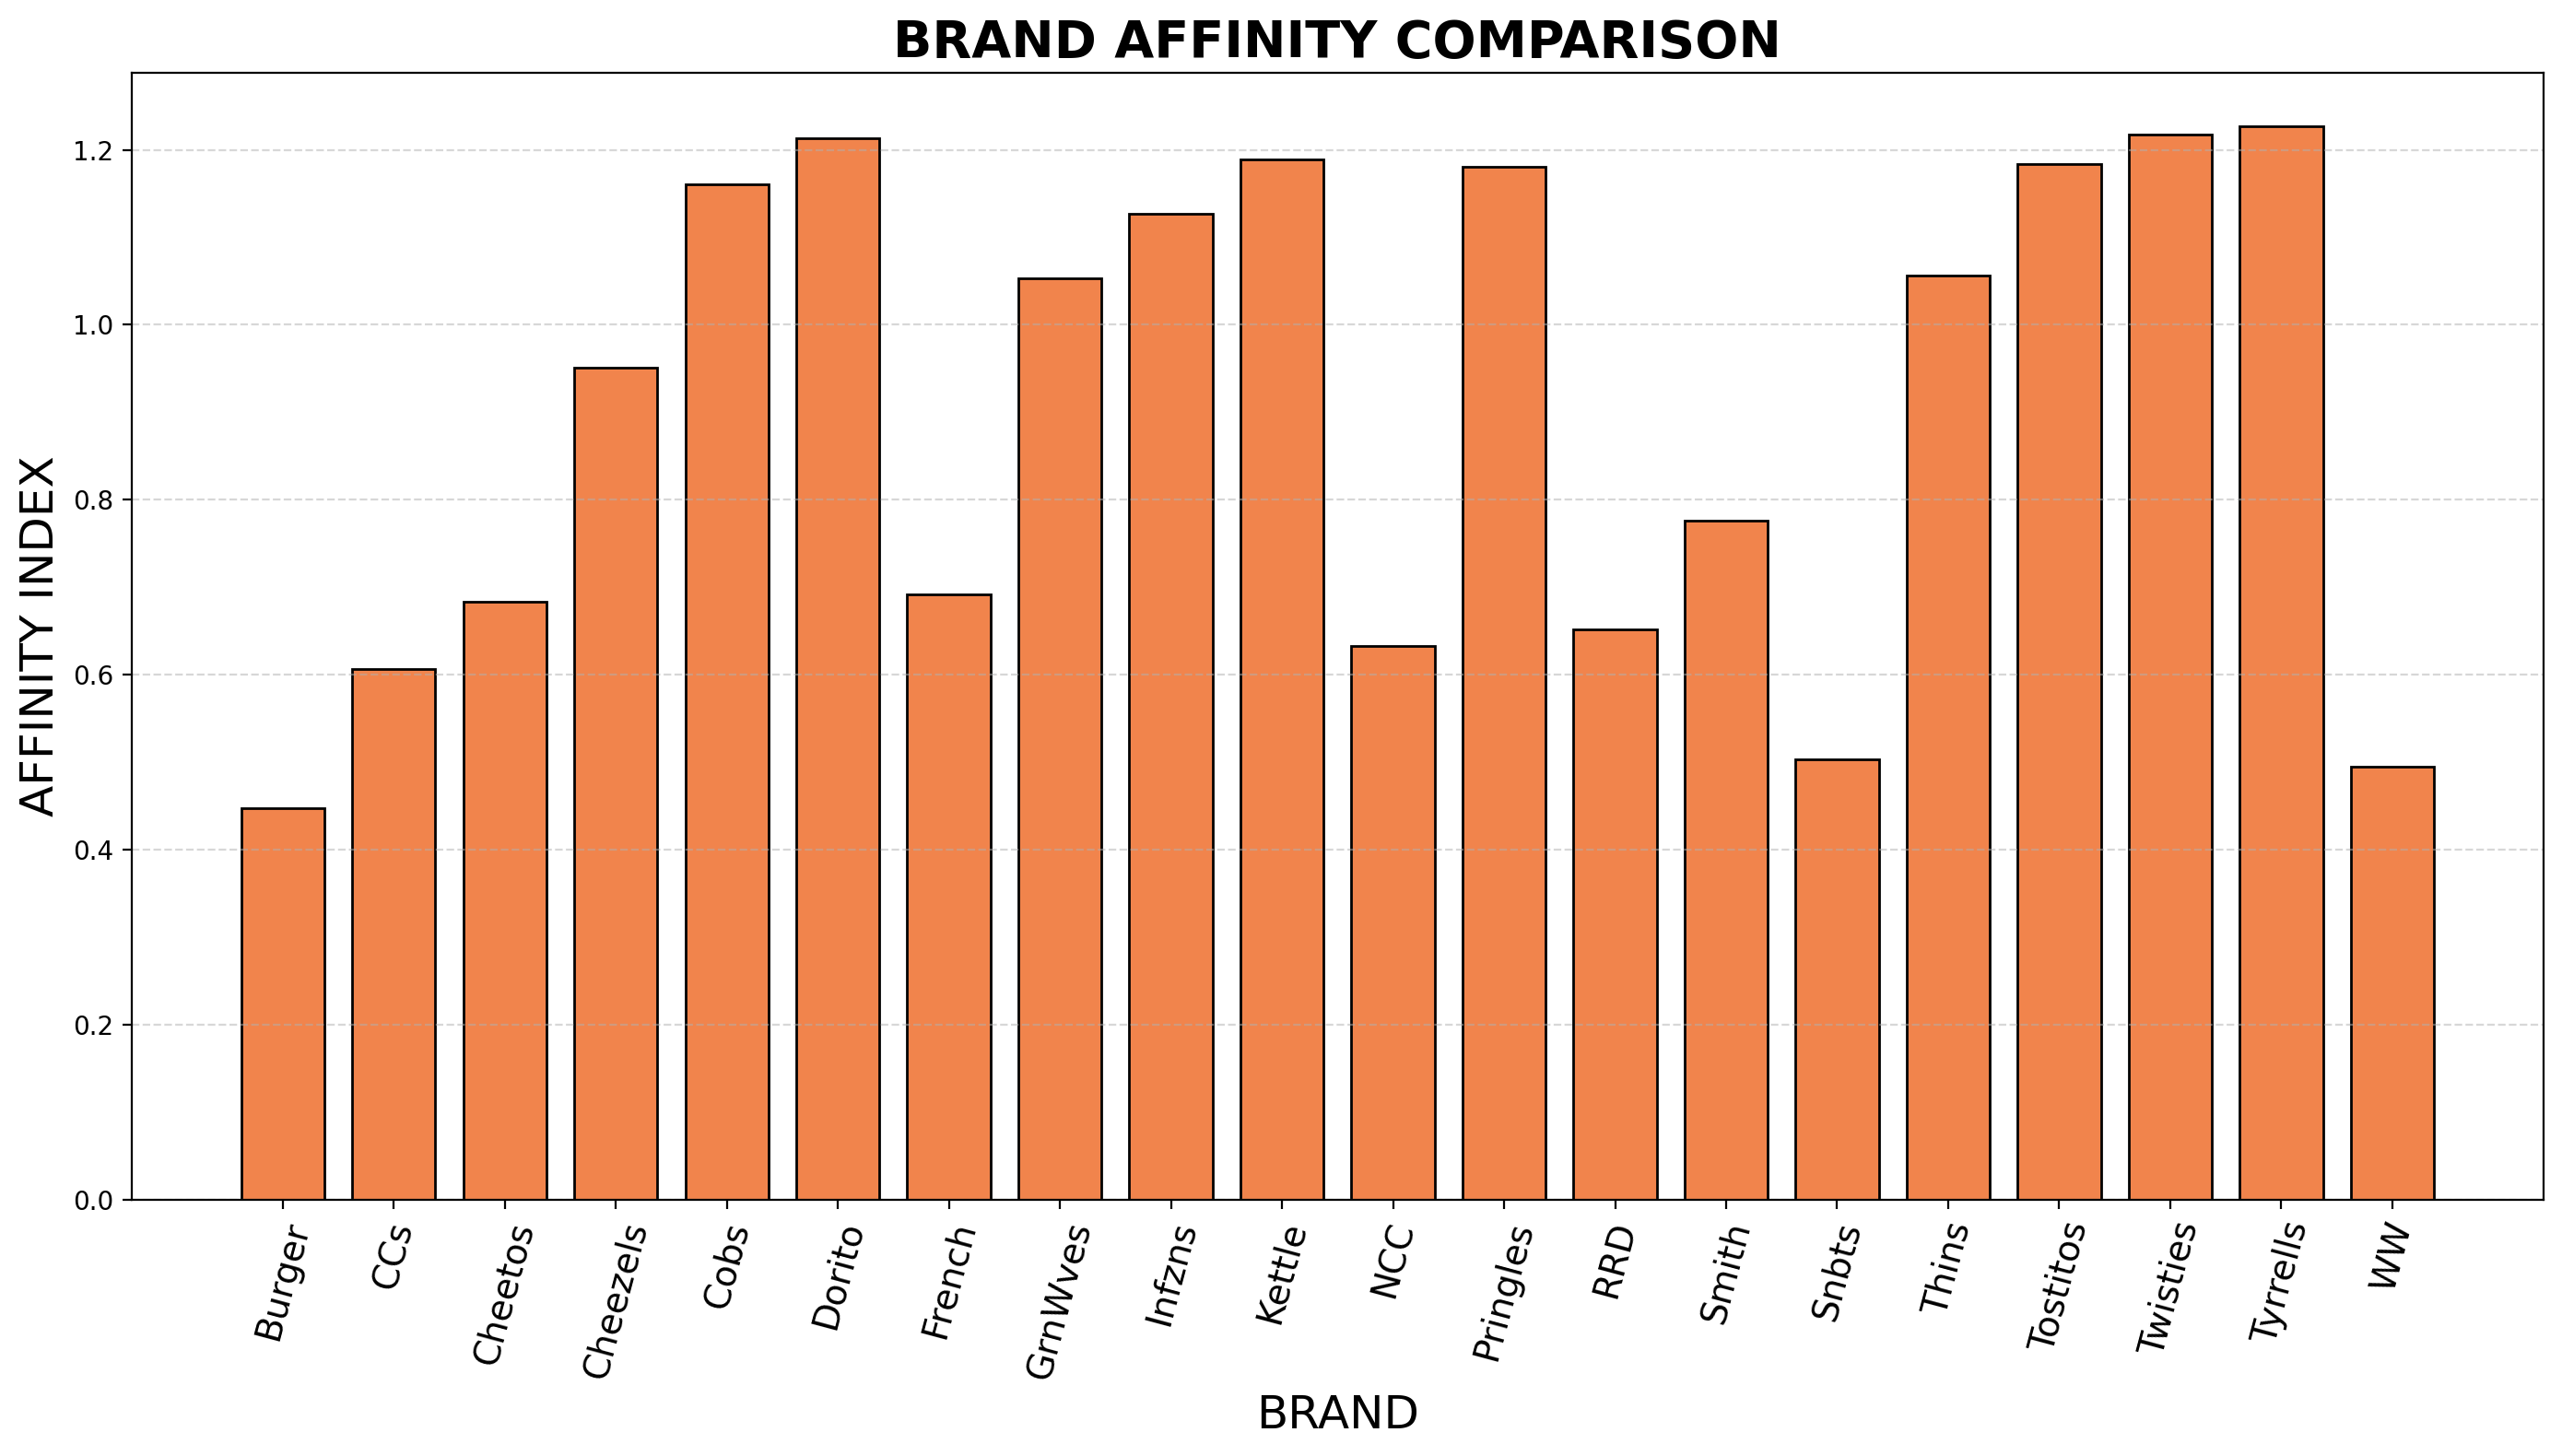

In [61]:
plt.figure(figsize=(14, 8), dpi=200)

plt.bar(merged_brand_qty.index, merged_brand_qty['OVERALL_AFFINITY'], width=0.75, color='#F1844C', edgecolor='black')

plt.xlabel('BRAND', fontsize=18)
plt.ylabel('AFFINITY INDEX', fontsize=18)
plt.title('BRAND AFFINITY COMPARISON', fontsize=20, fontweight='bold')

plt.xticks(rotation=75, fontsize=14)

plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

It appears that within the Mainstream - Young Singles/Couples community, Kettle, Dorito & Pringles are mostly preferred for purchase (which are also popular across all segments). In comparison to other segments based on the Affinity Index, Tyrrells and Twisties are more popular with about 23% increased likeliness for purchase whearas Burger chips are 50% less preferable for purchase. 

In [54]:
mainstream_packsize_qty = mainstream_young.groupby('PACK_SIZE').agg(MAINSTREAM_PACKSIZE_QTY=pd.NamedAgg(column='PROD_QTY', aggfunc='sum'))
mainstream_packsize_qty['MAINSTREAM_AFFINITY'] = mainstream_packsize_qty['MAINSTREAM_PACKSIZE_QTY'] / total_qty1


others_packsize_qty = others.groupby('PACK_SIZE').agg(OTHERS_PACKSIZE_QTY=pd.NamedAgg(column='PROD_QTY', aggfunc='sum'))
others_packsize_qty['OTHERS_AFFINITY'] = others_packsize_qty['OTHERS_PACKSIZE_QTY'] / total_qty2

merged_packsize_qty = pd.merge(mainstream_packsize_qty, others_packsize_qty, on="PACK_SIZE")
merged_packsize_qty['OVERALL_AFFINITY'] = mainstream_packsize_qty['MAINSTREAM_AFFINITY'] / others_packsize_qty['OTHERS_AFFINITY']
merged_packsize_qty.sort_values(by='OVERALL_AFFINITY', ascending=False)


MAINSTREAM_PACKSIZE_QTY  MAINSTREAM_AFFINITY  OTHERS_PACKSIZE_QTY  \
PACK_SIZE                                                                      
270                           1153             0.031829                 6607   
380                           1165             0.032160                 6776   
330                           2220             0.061284                13434   
110                           3850             0.106280                23607   
134                           4326             0.119420                26647   
210                           1055             0.029124                 6560   
135                            535             0.014769                 3408   
250                            520             0.014355                 3390   
170                           2926             0.080773                21175   
150                           5709             0.157598                42976   
175                           9237             0.254990                71539   
165                           2016             0.055652                16231   
190                            271             0.007481                 3197   
180                            130             0.003589                 1628   
160                            232             0.006404                 3221   
125                            109             0.003009                 1575   
90                             230             0.006349                 3324   
200                            325             0.008972                 4868   
70                             110             0.003037                 1656   
220                            106             0.002926                 1723   

           OTHERS_AFFINITY  OVERALL_AFFINITY  
PACK_SIZE                                     
270               0.025070          1.269599  
380               0.025711          1.250818  
330               0.050975          1.202234  
110               0.089576          1.186483  
134               0.101111          1.181081  
210               0.024892          1.170011  
135               0.012932          1.142078  
250               0.012863          1.115951  
170               0.080348          1.005292  
150               0.163071          0.966441  
175               0.271452          0.939355  
165               0.061588          0.903622  
190               0.012131          0.616692  
180               0.006177          0.580939  
160               0.012222          0.524009  
125               0.005976          0.503486  
90                0.012613          0.503394  
200               0.018471          0.485707  
70                0.006284          0.483252  
220               0.006538          0.447571

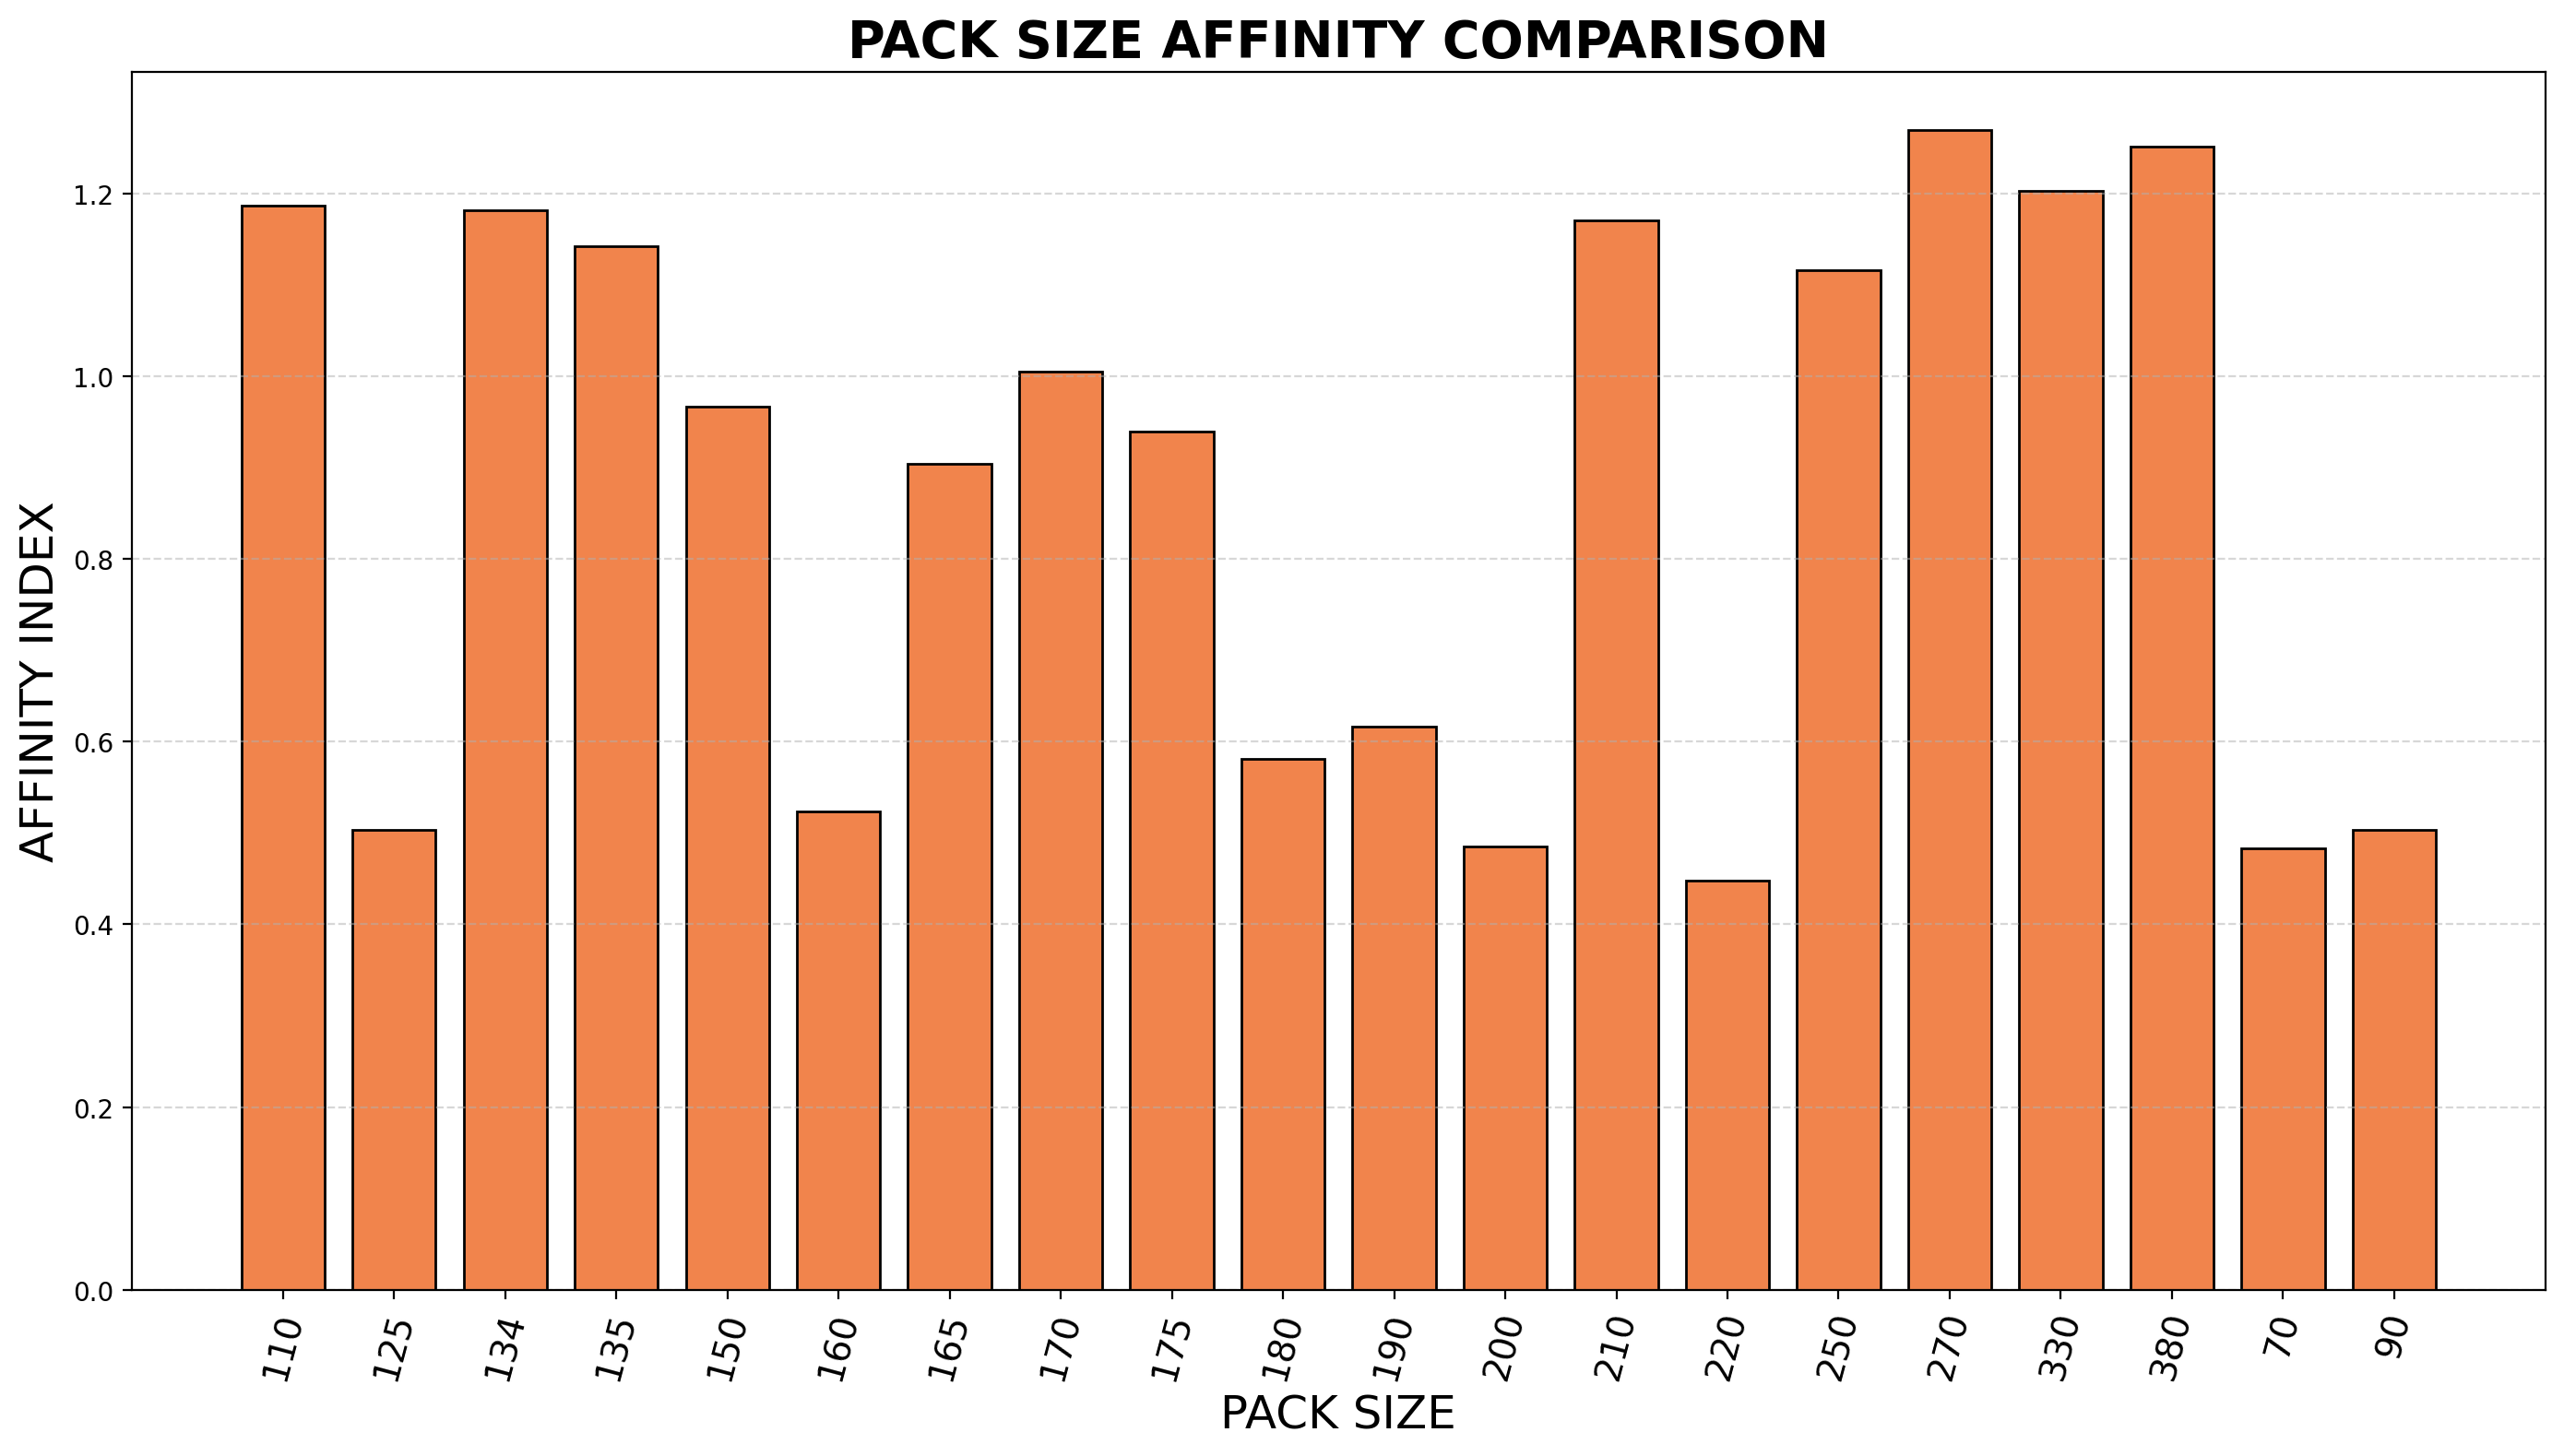

In [62]:
plt.figure(figsize=(14, 8), dpi=200)

plt.bar(merged_packsize_qty.index, merged_packsize_qty['OVERALL_AFFINITY'], width=0.75, color='#F1844C', edgecolor='black')

plt.xlabel('PACK SIZE', fontsize=18)
plt.ylabel('AFFINITY INDEX', fontsize=18)
plt.title('PACK SIZE AFFINITY COMPARISON', fontsize=20, fontweight='bold')

plt.xticks(rotation=75, fontsize=14)

plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

The most common chip size bought by our target customers in the Mainstream - Young Singles/Couples segment is 175g, with almost 1000 units sold. The second popular pack size is 150g, with appropximately 5700 units sold. In comparison to other segments based on the Affinity Index, chips with pack size of 270g are more likely to be purchased by the target group whereas 220g chip pack size reflects lowest volume of sales among target group in comparison to other segments. 

# Summary of Insights

1. Sales are consistent throughout the year, with a slight increase due to seasonality effect in December. No sales recorded on December 25, 2018 due to store closure of National Holiday.
2. Top performing customer segments: Older Families (Budget), Young Singles/Couples (Mainstream), Retirees (Mainstream)
3. Customers from Older Family - Budget spent the most on chips ($156863.75 of Total Sales), despite their small population. Customers from New Family - Premium spent the least ($10760.80). In combination of all premium levels, customers from Older Singles/Couples segment contributed to the highest purchase value ($376013.65), suggesting potential for targeted marketing. Meanwhile, for the Retirees segment, Mainstream customers outspent other groups. 
4. Upon hypothesis testing, the average price per unit for Mainstream - Young to MidAge Singles & Couples is statistically different than the average price per unit for Budget/Premium - Young to MidAge Singles & Couples, indicating that the Mainstream shoppers are willing to pay more per units for chips. 
5. It appears that within the Mainstream - Young Singles/Couples community, Kettle, Dorito & Pringles are mostly preferred for purchase (which are also popular across all segments). In comparison to other segments based on the Affinity Index, Tyrrells and Twisties are more popular with about 23% increased likeliness for purchase whearas Burger chips are 50% less preferable for purchase. 
6. The most common chip size bought by our target customers in the Mainstream - Young Singles/Couples segment is 175g, with almost 1000 units sold. The second popular pack size is 150g, with appropximately 5700 units sold. In comparison to other segments based on the Affinity Index, chips with pack size of 270g are more likely to be purchased by the target group whereas 220g chip pack size reflects lower volume of sales among target group in comparison to other segments.  

7. Recommendations: 
- Leverage Seasonality: Introduce holiday-themed packaging and promotions in December to capitalize on the seasonal increase in sales. To offset sales loss during National Holiday(s) (e.g.: Christmas), it is a good idea to offer extended promotions around holidays to generate interests and increase sales volume.
- Focus on High-Value Segments:
    - For Older Families (Budget): The business should promote value-oriented packs (e.g.: bulk discounts or family packs) to capture their high total spend despite smaller population size.
    - Retirees (Mainstream): Focus on affordable, trusted brands with cross-promotions (e.g., dips with chips) to maximize sales.
- Optimize Pricing and Offerings:
    - Mainstream Young to MidAge Singles & Couples: Based on the data for these segments on average spending per chip unit, it is recommended to introduce premium lines or limited-edition flavors to cater to their willingness to pay more per unit.
- Tailor Brand Portfolios:
    - Top Performing Brands: Focus on brands like Kettle, Doritos, Pringles, Tyrrells, Twisties, which are most preferred in the Mainstream - Young Singles/Couples segments. Reduce focus on less popular brands like Burger chips.
- Align Pack Sizes with Segment Preferences: Stock more 175g and 150g packs for Mainstream - Young Singles/Couples. Promote 270g packs, which show a higher likelihood of purchase based on Affinity Index, while considering adjustments for 220g packs due to lower demand.
- Targeted Marketing & Promotions:
    - Older Families (Budget): Offer value packs (e.g., Buy 2, Get 1 Free).
    - Older Singles/Couples (All Premium Levels): Promote premium experiences with gourmet or healthier chip options.
    - Young Singles/Couples (Mainstream): Focus on trendy promotions with fun and premium brand combos.
    - Retirees (Mainstream): Emphasize trustworthy, classic, or healthy chip brands to cater to their diet preference.
- In-Store Experience: Group popular brands/pack size together and place near complementary products to increase impulse purchases.
